<a href="https://colab.research.google.com/github/jogapritam/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Make a handshake to our collab notebook with googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#here it's the path, where data is kept
file_path = ('/content/drive/MyDrive/Copy of Global Terrorism Data.csv')
#using this code our dataframe is going to read
df = pd.read_csv(file_path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#check our first and last 5 rows
df.head(2)
#df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
#check the dimension of our dataframe
df.shape

(181691, 135)

In [ ]:
#create a new column named casualities
df['casualities']=df['nwound']+df['nkill']

In [ ]:
#after adding new column, dimention of dataframe will change
df.shape

(181691, 136)

In [ ]:
#check the structure ot our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to casualities
dtypes: float64(56), int64(22), object(58)
memory usage: 188.5+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'casualities'],
      dtype='object', length=136)

In [ ]:
#check the column names of our dataframe
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
#lets check the number of data present in each variable
df.count()

eventid        181691
iyear          181691
imonth         181691
iday           181691
approxdate       9239
                ...  
INT_IDEO       181691
INT_MISC       181691
INT_ANY        181691
related         25038
casualities    164817
Length: 136, dtype: int64

In [ ]:
#lets check the short description of our dataframe
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9

In [ ]:
#we want to keep only few columns as per our requirement
df_1 = df[['iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','attacktype1_txt','target1','nkill','nwound','casualities','summary','gname','targtype1_txt','weaptype1_txt','success','motive']]
df_1.head(2)

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,target1,nkill,nwound,casualities,summary,gname,targtype1_txt,weaptype1_txt,success,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,1.0,NaN,MANO-D,Private Citizens & Property,Unknown,1,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1,NaN


In [ ]:
#now check the shape of required dataframe
df_1.shape

(181691, 19)

In [ ]:
#checking for Null values/missing data
df_1.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
target1               636
nkill               10313
nwound              16311
casualities         16874
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
success                 0
motive             131130
dtype: int64

In [ ]:
#checking the percentage of missing data
missing_value_percentage = df_1.isnull().sum()*100/len(df)
missing_value_percentage

iyear               0.000000
imonth              0.000000
iday                0.000000
country_txt         0.000000
region_txt          0.000000
city                0.238867
latitude            2.507554
longitude           2.508104
attacktype1_txt     0.000000
target1             0.350045
nkill               5.676120
nwound              8.977330
casualities         9.287196
summary            36.396409
gname               0.000000
targtype1_txt       0.000000
weaptype1_txt       0.000000
success             0.000000
motive             72.171984
dtype: float64

In [ ]:
#as variable motive contains more than 70% nan values we have to drop that column
df_1.drop(['motive'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_1.shape

(181691, 18)

In [ ]:
df_1.head(2)

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,target1,nkill,nwound,casualities,summary,gname,targtype1_txt,weaptype1_txt,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,1.0,NaN,MANO-D,Private Citizens & Property,Unknown,1
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1


In [ ]:
#to know the correlation between our dataframe
corr_df = df_1.corr()
corr_df

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualities,success
iyear,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273,0.013934,-0.082963
imonth,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938,0.003446,-0.002845
iday,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268,-0.001269,-0.011802
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988,0.009996,-0.073715
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223,0.000021,-0.000858
nkill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375,0.690476,0.053115
nwound,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000,0.980387,0.025804
casualities,0.013934,0.003446,-0.001269,0.009996,0.000021,0.690476,0.980387,1.000000,0.035385
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,0.053115,0.025804,0.035385,1.000000


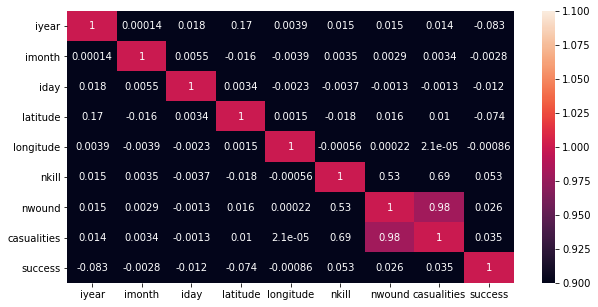

In [ ]:
sns.heatmap(corr_df,vmin=1,annot=True)

In [ ]:
#we want to know the top 20 highest affected countries 
top20_affected_countries = df_1["country_txt"].value_counts()[:20]
top20_affected_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

Text(0.5, 0, 'country name')

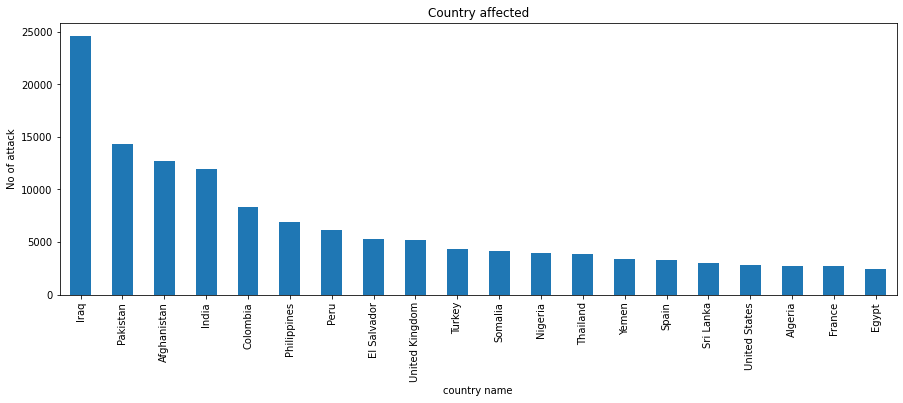

In [ ]:
top20_affected_countries.plot(kind = 'bar')

plt.title('Country affected')
plt.ylabel('No of attack')
plt.xlabel('country name')

In [ ]:
Top_terrorist_groups = df_1['gname'].value_counts()[:20]
Top_terrorist_groups

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 0, 'Gang Name')

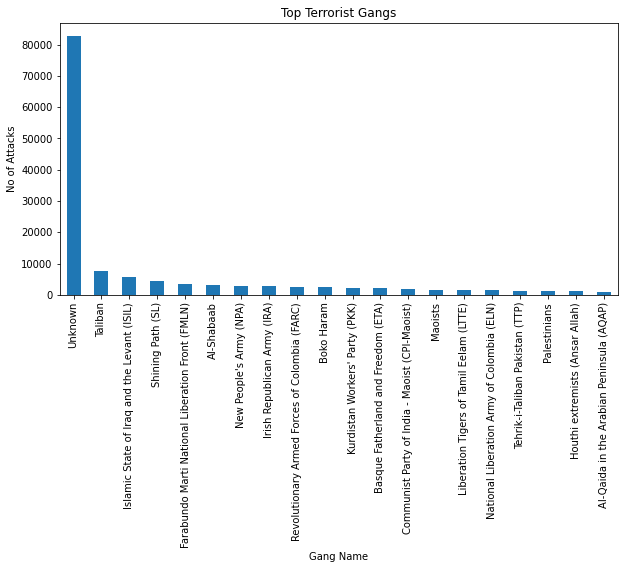

In [ ]:
Top_terrorist_groups.plot(kind='bar')
plt.title('Top Terrorist Gangs')
plt.ylabel('No of Attacks')
plt.xlabel('Gang Name')

In [ ]:
#we want to know year wise casualities counts on different attack type
year_wise_casualities = df_1.groupby(['iyear','attacktype1_txt'])['casualities'].count().unstack()
print(year_wise_casualities)

attacktype1_txt  Armed Assault  Assassination  ...  Unarmed Assault  Unknown
iyear                                          ...                          
1970                      42.0           22.0  ...              3.0      6.0
1971                      35.0           14.0  ...              NaN      2.0
1972                      10.0           90.0  ...              NaN      1.0
1973                      43.0           40.0  ...              2.0      1.0
1974                      26.0           41.0  ...              3.0      1.0
1975                      33.0           65.0  ...              NaN      1.0
1976                      95.0           79.0  ...              2.0      2.0
1977                     197.0          105.0  ...              NaN     12.0
1978                     174.0          250.0  ...              4.0     35.0
1979                     373.0          507.0  ...              6.0    139.0
1980                     432.0          602.0  ...              2.0     58.0

Text(0.5, 0, 'Year')

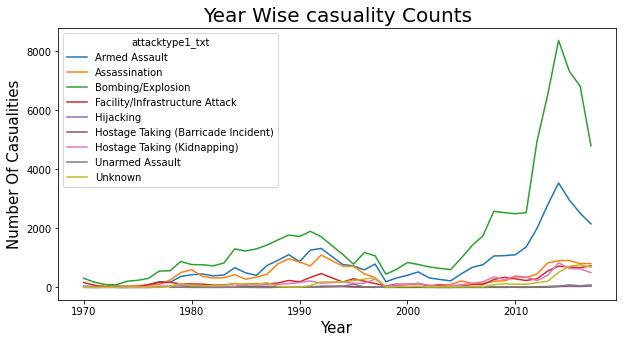

In [ ]:
year_wise_casualities.plot()

plt.title('Year Wise casuality Counts',size=20)
plt.ylabel('Number Of Casualities',size=15)
plt.xlabel('Year',size=15)

Text(0, 0.5, 'Number of Attack')

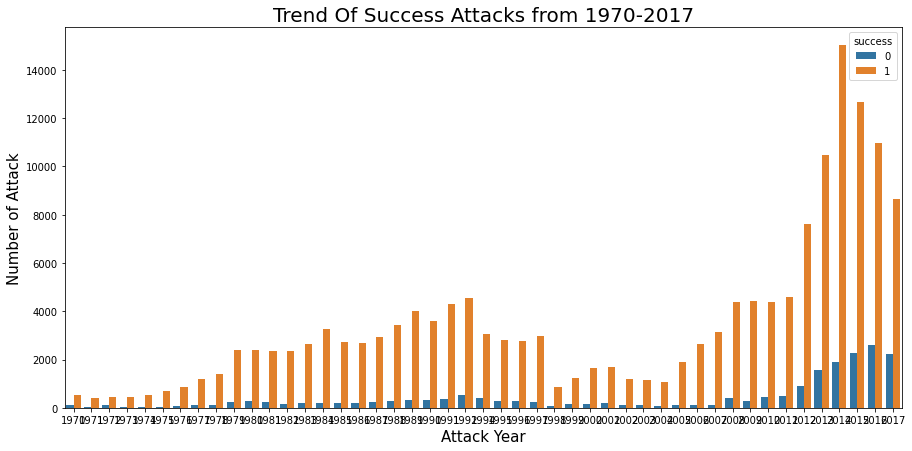

In [ ]:
#we want to know the success trend of terrorist attack from 1970-2017
plt.figure(figsize=(15,7))
sns.countplot(x='iyear',hue='success',data=df_1)

plt.title('Trend Of Success Attacks from 1970-2017',size=20)
plt.xlabel('Attack Year',size=15)
plt.ylabel('Number of Attack',size=15)